In [2]:
import pandas as pd

print(pd.Series([9.8,4,3.7,6.4]))

0    9.8
1    4.0
2    3.7
3    6.4
dtype: float64


In [3]:
## Dataframe
alumnes = [[2000,"Ruben Serrano", 7], [1998,"Anna Gonzalez", 8], [2002,"Felipe Gomez", 4] ]
df_alumnes = pd.DataFrame(alumnes, columns= ['birth_year', 'name', 'average_grade'])
df_alumnes

,birth_year,name,average_grade
0,2000,Ruben Serrano,7
1,1998,Anna Gonzalez,8
2,2002,Felipe Gomez,4


In [4]:
# importamos dataframe de un csv

df_comic = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/comic-characters/marvel-wikia-data.csv")
df_comic.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [5]:
# estadísticas bàsicas
df_comic.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [6]:
# accedemos a un elemento por su indice

df_comic.loc[[0,3],["name", "APPEARANCES"]]

,name,APPEARANCES
0,Spider-Man (Peter Parker),4043.0
3,"Iron Man (Anthony \""Tony\"" Stark)",2961.0


In [7]:
# filtramos por caracteres
df_maleMain = df_comic[(df_comic.SEX == "Male Characters") & (df_comic.APPEARANCES >= 1000)]
df_femaleMain = df_comic[(df_comic["SEX"] == "Female Characters") & (df_comic["APPEARANCES"] >= 1000) ]

print(df_femaleMain.loc[31])


page_id                                 8650
name                  May Reilly (Earth-616)
urlslug             \/May_Reilly_(Earth-616)
ID                          No Dual Identity
ALIGN                        Good Characters
EYE                                Blue Eyes
HAIR                               Grey Hair
SEX                        Female Characters
GSM                                      NaN
ALIVE                      Living Characters
APPEARANCES                           1000.0
FIRST APPEARANCE                      Aug-62
Year                                  1962.0
Name: 31, dtype: object


In [8]:
# modo query
df_female_popular = df_comic.query('SEX == "Female Characters" and APPEARANCES  >= 1000')
print(df_female_popular)

    page_id                          name                         urlslug  \
11     1863       Susan Storm (Earth-616)       \/Susan_Storm_(Earth-616)   
13     2614      Ororo Munroe (Earth-616)      \/Ororo_Munroe_(Earth-616)   
17     1978  Mary Jane Watson (Earth-616)  \/Mary_Jane_Watson_(Earth-616)   
24     2512    Wanda Maximoff (Earth-616)    \/Wanda_Maximoff_(Earth-616)   
26     1976    Janet van Dyne (Earth-616)    \/Janet_van_Dyne_(Earth-616)   
27    65219         Jean Grey (Earth-616)         \/Jean_Grey_(Earth-616)   
28     6545  Natalia Romanova (Earth-616)  \/Natalia_Romanova_(Earth-616)   
31     8650        May Reilly (Earth-616)        \/May_Reilly_(Earth-616)   

                  ID            ALIGN         EYE         HAIR  \
11   Public Identity  Good Characters   Blue Eyes   Blond Hair   
13   Public Identity  Good Characters   Blue Eyes   White Hair   
17  No Dual Identity  Good Characters  Green Eyes     Red Hair   
24   Public Identity  Good Characters  Gre

In [9]:
df_female_popular = df_comic.query('SEX == "Female Characters" and APPEARANCES  >= 100')
len(df_female_popular)
df_male_popular = df_comic.query('SEX == "Male Characters" and APPEARANCES  >= 100')
len(df_male_popular)

281

In [10]:
df_female_popular.query('ALIGN == "Good Characters"')['APPEARANCES'].mean()
df_female_popular.query('ALIGN == "Neutral"')['APPEARANCES'].mean()
df_female_popular.query('ALIGN == "Bad Characters"')['APPEARANCES'].mean()

196.5

In [11]:
print(df_female_popular['APPEARANCES'].mean())
print(df_male_popular['APPEARANCES'].mean())

317.4296875
381.1067615658363


In [12]:
df_comic_red = df_comic[['SEX','ALIGN','APPEARANCES','Year']]
df_comic_red = df_comic_red.query('APPEARANCES  >= 100')
#opcion 1
df_comic_red.groupby(['SEX','ALIGN']).agg({'APPEARANCES': 'mean', 'Year': 'min'})
#opcion 2
#df_comic_red.groupby(['SEX','ALIGN'])['APPEARANCES'].mean()
#df_comic_red.groupby(['SEX','ALIGN'])['Year'].min()

APPEARANCES    Year
SEX                    ALIGN                                  
Agender Characters     Neutral Characters   348.000000  1984.0
Female Characters      Bad Characters       196.500000  1964.0
                       Good Characters      340.030303  1940.0
                       Neutral Characters   281.071429  1939.0
Genderfluid Characters Neutral Characters   532.000000  1949.0
Male Characters        Bad Characters       188.092308  1940.0
                       Good Characters      445.878788  1939.0
                       Neutral Characters   450.555556  1949.0

In [13]:
# exportamos a csv
df_comic_red = df_comic[['name','SEX','ALIGN','APPEARANCES','Year']]
df_comic_red.to_csv("marvel_resumen.csv", encoding='utf-8')


Visualizaciones Bàsicas


In [14]:
df_top10 = df_comic_red.sort_values(by='APPEARANCES',ascending=False)[0:10]

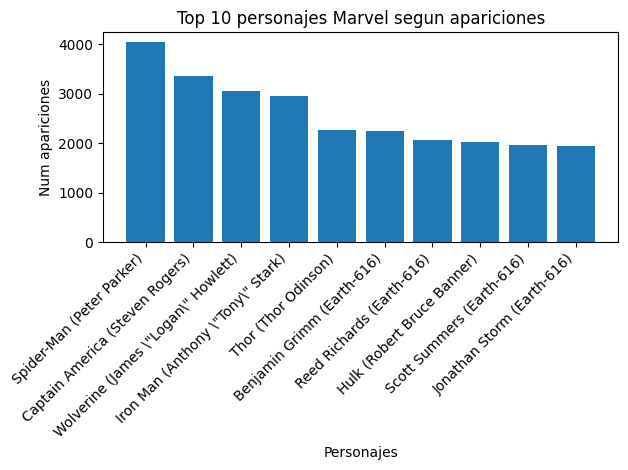

In [15]:
import matplotlib.pyplot as plt
plt.bar(df_top10['name'],df_top10['APPEARANCES'])
plt.title('Top 10 personajes Marvel segun apariciones')
plt.xlabel('Personajes')
plt.ylabel('Num apariciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

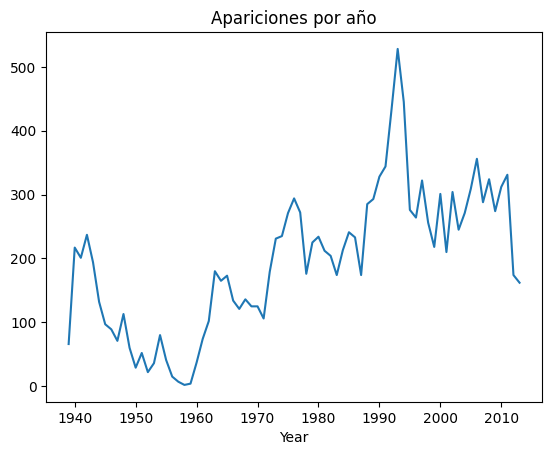

In [16]:
df_comic_red.groupby('Year')['APPEARANCES'].count().plot(kind='line', title='Apariciones por año')
plt.show()


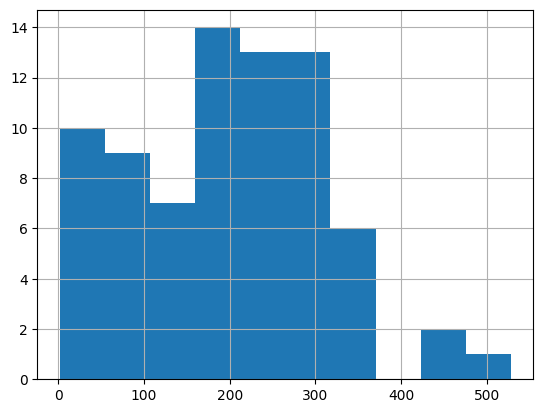

In [17]:
#Histograma
df_comic_red.groupby('Year')['APPEARANCES'].count().hist(bins=10)
plt.show()

In [22]:
df_comic_red.head()

,name,SEX,ALIGN,APPEARANCES,Year
0,Spider-Man (Peter Parker),Male Characters,Good Characters,4043.0,1962.0
1,Captain America (Steven Rogers),Male Characters,Good Characters,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Male Characters,Neutral Characters,3061.0,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Male Characters,Good Characters,2961.0,1963.0
4,Thor (Thor Odinson),Male Characters,Good Characters,2258.0,1950.0


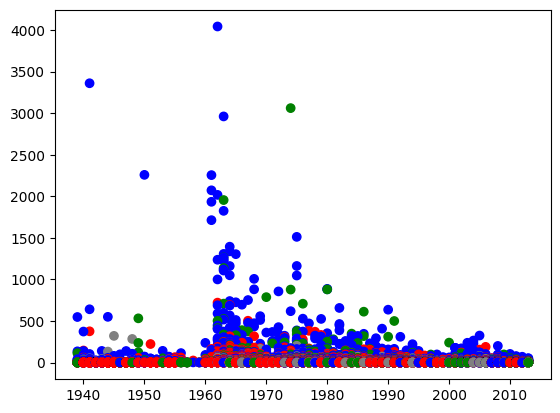

In [41]:
# scatter
colors = {'Good Characters': 'blue', 'Bad Characters': 'red', 'Neutral Characters': 'green'}
colors = df_comic_red['ALIGN'].map({'Good Characters': 'blue', 'Bad Characters': 'red', 'Neutral Characters': 'green'}).fillna('Gray')

plt.scatter(df_comic_red['Year'],df_comic_red['APPEARANCES'],c=colors)
#plt.show()

In [42]:
for color in colors:
  print(color)

Se han truncado las últimas 5000 líneas del flujo de salida.
green
red
red
red
red
red
red
red
green
red
red
red
red
red
red
red
green
green
red
red
red
red
red
red
red
green
red
red
red
red
red
green
red
red
red
red
red
red
red
red
red
green
red
red
green
blue
red
red
red
red
green
red
green
red
red
red
green
red
red
green
green
red
green
red
green
green
red
red
red
red
green
green
green
green
red
red
red
red
red
red
red
blue
red
red
green
red
green
red
red
red
red
red
red
red
red
red
red
red
red
red
red
green
green
red
red
green
red
green
red
red
red
red
green
blue
red
red
red
red
red
red
red
red
green
green
red
red
green
red
red
red
red
red
red
Gray
green
blue
red
green
red
blue
red
blue
green
red
red
green
blue
green
green
red
red
green
green
green
blue
red
red
red
red
green
red
red
blue
red
blue
green
red
green
red
green
red
red
red
red
red
red
red
green
blue
blue
red
red
red
red
red
blue
red
red
red
red
red
green
blue
red
red
red
red
red
red
red
blue
red
red
red
red
red
green
red

# EJERCICIO

## ACTIVITAT

Analitzarem els incendis al brasil entre l'any 1998 i el 2007. https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil


Carregueu les dades de l'arxiu amazon.csv , que podeu trobar a la carpeta data, en un dataframe. Aquest conjunt de dades recull informació sobre el nombre d'incendis en boscos a Brasil entre el 1998 i el 2017.  Mostreu el número de files del dataframe i els noms de les columnes.

In [1]:
import pandas as pd

#Download lastest version 
df_brasil = pd.read_csv('amazon.csv', thousands='.', encoding="ISO-8859-1")
df_brasil= df_brasil.dropna(subset=['year', 'number'])
df_brasil.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


Agrupeu les dades carregades a l'exercici 1 per any i, per cada any, mostreu el nombre total d'incendis que hi va haver en tot el país.

In [2]:
df_brasil.shape


(6454, 5)

Mostra gràficament la lína temporal del nombre d'incendis al brasil durant els darrers anys

In [3]:
fireByYears = df_brasil.groupby('year')['number'].sum()
print(fireByYears)

year
1998    123881
1999    132526
2000     97541
2001    137926
2002    220015
2003    208476
2004    248928
2005    224294
2006    123327
2007    206412
2008    117993
2009    111763
2010    223228
2011    131271
2012    163353
2013    105572
2014    170259
2015    209296
2016    171132
2017    246289
Name: number, dtype: int64


Mostreu gràficament la suma total d'incendis per mes per detectar els mesos on es produeixen més incendis per mes. Feu el mateix amb la mitja. En quin mes es produeixen mes incendis



Text(0.5, 1.0, 'Incendios por año')

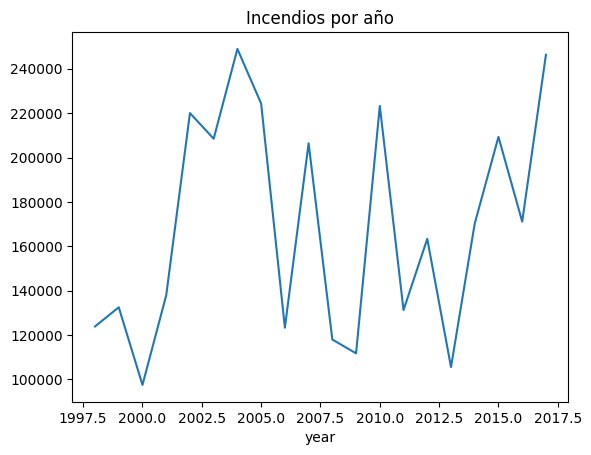

In [4]:
import matplotlib.pyplot as plt


fireByYears.plot(kind='line')
plt.title('Incendios por año')

Mostreu també la mitja d'incendis anual, mensual i per estat

In [5]:
fireByMonthYear= df_brasil.groupby(['state','year', 'month']) ['number'].mean()
print(fireByMonthYear)

state      year  month    
Acre       1998  Abril            0.0
                 Agosto         130.0
                 Dezembro         7.0
                 Fevereiro        0.0
                 Janeiro          0.0
                               ...   
Tocantins  2017  Maio           576.0
                 Março           98.0
                 Novembro       434.0
                 Outubro       2969.0
                 Setembro     10737.0
Name: number, Length: 5497, dtype: float64


Mostreu els estats de Brasil on van enregistrar més de 800 incendis al mes, comptant els mesos de juny, juliol i agost. Heu de mostrar com a resultat una llista dels estats sense repetir.

** La funció unique us pot ser útil

In [6]:
df_brasil_summer = df_brasil[df_brasil['month'].isin(['Agosto','Junho', 'Julho'])]
df_brasil_top_summer= df_brasil_summer.groupby(('state'))['number'].mean()
print(df_brasil_top_summer[df_brasil_top_summer>800 ])


state
Amazonas        806.216667
Maranhao       1687.500000
Mato Grosso    2668.800000
Pará           3057.366667
Rondonia       1142.016667
Tocantins      1304.950000
Name: number, dtype: float64


Mostra  gràficament la distrbució d'incendis per estat durant els mesos de juny, juliol i agost

In [13]:
df_brasilState = df_brasil_summer.groupby(['state'])['number'].mean()
df_brasilState.sort_values(['number'])

state         month   
Mato Grosso   Setembro    26929
Pará          Setembro    25004
Maranhao      Setembro    14825
Pará          Agosto      11962
Tocantins     Setembro    10737
Pará          Novembro     9079
Mato Grosso   Agosto       7717
Pará          Outubro      7628
Amazonas      Agosto       6316
Maranhao      Outubro      6011
Rondonia      Setembro     5638
Pará          Julho        4985
Minas Gerais  Setembro     4697
Rondonia      Agosto       4287
Amazonas      Setembro     4033
Bahia         Outubro      4005
Maranhao      Agosto       3875
Tocantins     Agosto       3536
Acre          Setembro     3429
Piau          Setembro     3422
Goias         Setembro     3238
Minas Gerais  Outubro      3062
Piau          Outubro      3004
Tocantins     Outubro      2969
Sao Paulo     Setembro     2868
Maranhao      Julho        2521
Goias         Outubro      2401
Tocantins     Julho        2397
Mato Grosso   Junho        2216
Minas Gerais  Agosto       2142
Amazonas      Jul

Volem buscar aquells estats on durant l'any 2017 van ocórrer més de 800 incendis al mes, durant qualsevol dels mesos de l'any. Heu de mostrar per pantalla l'estat, el mes (o els mesos si la condició es compleix en varis mesos) i el nombre total d'incendis enregistrats en el mes corresponent.

In [ ]:
df_brasil2017 = df_brasil[df_brasil['year'] == 2017]
df_brasil2017_agrupado = df_brasil2017.groupby(['state', 'month'])['number'].sum()
df_brasil2017_hotMonths = df_brasil2017_agrupado[df_brasil2017_agrupado > 800]
print(df_brasil2017_hotMonths.sort_values(ascending=False))


Creeu una còpia del dataframe original per posteriroment exportar-lo a un csv afegint una nova columna que ens indicarà per cada fila el nivell de risc d'aquella fila. Definim tres nivells de risc:
high : si s'ha enregistrat una fila amb més de 800 incendis medium : si s'ha enregistrat una fila amb un nombre d'incendis entre 400 i 800low : si s'ha enregistrat una fila amb menys de 400 incendis
Mostreu per pantalla aquelles files que corresponguin a un nivell de risc alt ( high ).

month      risk_level
Abril      Low              45
Agosto     High          11962
Fevereiro  Low              14
Janeiro    Low             219
Julho      High           4985
Name: number, dtype: int64

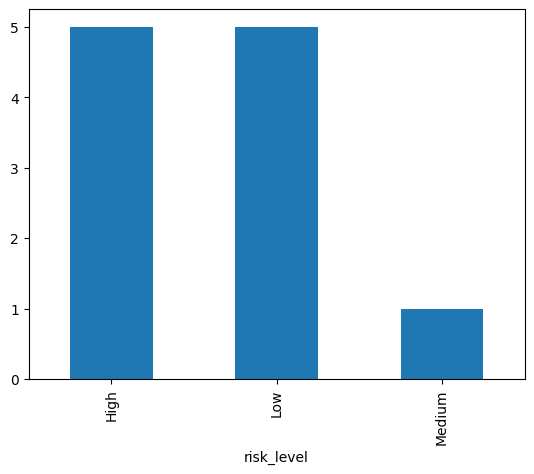

In [22]:
df_brasil_cp = df_brasil.copy()

df_brasil_cp.loc[df_brasil_cp['number'] >= 800, 'risk_level'] = 'High'
df_brasil_cp.loc[(df_brasil_cp['number'] < 800) & (df_brasil_cp['number'] >= 400), 'risk_level'] = 'Medium'
df_brasil_cp.loc[df_brasil_cp['number'] < 400, 'risk_level'] = 'Low'

df_brasil_cp.head()

df_brasil_cp_para = df_brasil_cp[(df_brasil_cp['year'] == 2017) & (df_brasil_cp['state'] == 'Pará')]
df_brasil_cp_para = df_brasil_cp_para.groupby(['risk_level'])['month'].count()
df_brasil_cp_para.plot(kind='bar')